In [1]:
# Instalando bibliotecas
!pip install pandas numpy matplotlib seaborn yfinance mplfinance

In [2]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [3]:
# Plotando o gráfico de candlestick
def plotar_dados(x):
  df = x.copy()
  kwargs = {'warn_too_much_data': len(df)}

  plt.figure(figsize=(18,6))
  mpf.plot(df, type='candle', title='Gráfico de Candlestick', ylabel='Preço', volume=True, **kwargs)
  plt.show()

In [4]:
# Símbolo da ação que você deseja baixar
symbol = 'AAPL'

# Baixe dados históricos do Yahoo Finance usando yfinance
aapl_data = yf.download(symbol, start="2013-01-01", end="2023-01-01")

display(aapl_data.head())


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791185,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579241,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117432,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022629,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065746,458707200


In [5]:
# Análise de quartis e medidas estatísticas
quartiles = aapl_data['Close'].quantile([0.25, 0.5, 0.75])
min_price = aapl_data['Close'].min()
max_price = aapl_data['Close'].max()

print("Análise de Quartis:")
for q, qq in zip(quartiles, [25,50,75]):
  print("\t", qq, round(q,2))
print(f"Preço Mínimo: {min_price:.2f}")
print(f"Preço Máximo: {max_price:.2f}")

Análise de Quartis:
	 25 26.98
	 50 41.31
	 75 91.53
Preço Mínimo: 13.95
Preço Máximo: 182.01


# Plotando em formato de Candlestick

<Figure size 1800x600 with 0 Axes>

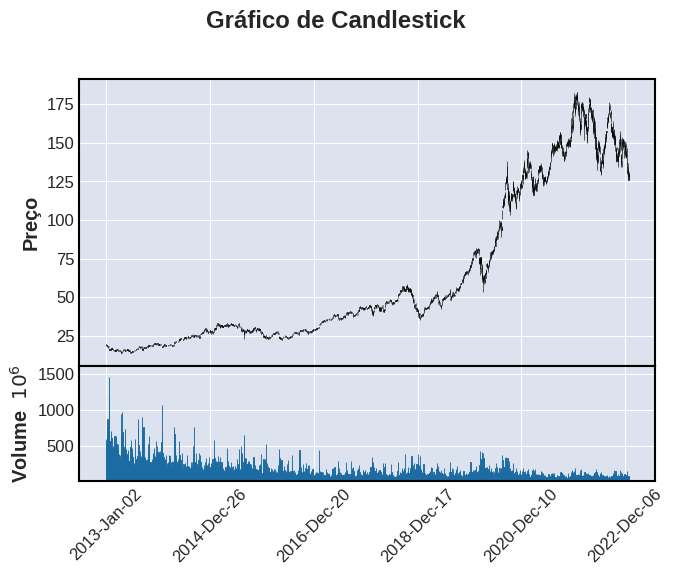

In [6]:
plotar_dados(aapl_data)

# Medindo Variação

In [7]:
aapl_data["diff"] = aapl_data["Close"] - aapl_data["Open"]

In [8]:
# Realizar análises matemáticas e estatísticas com Pandas e Numpy
# Exemplo: Calculando a média e o desvio padrão dos preços de fechamento
mean_close_price = np.mean(aapl_data['diff'])
std_close_price = np.std(aapl_data['diff'])

print(f"Média dos preços de fechamento: {mean_close_price:.2f}")
print(f"Desvio padrão dos preços de fechamento: {std_close_price:.2f}")

Média dos preços de fechamento: 0.03
Desvio padrão dos preços de fechamento: 1.29


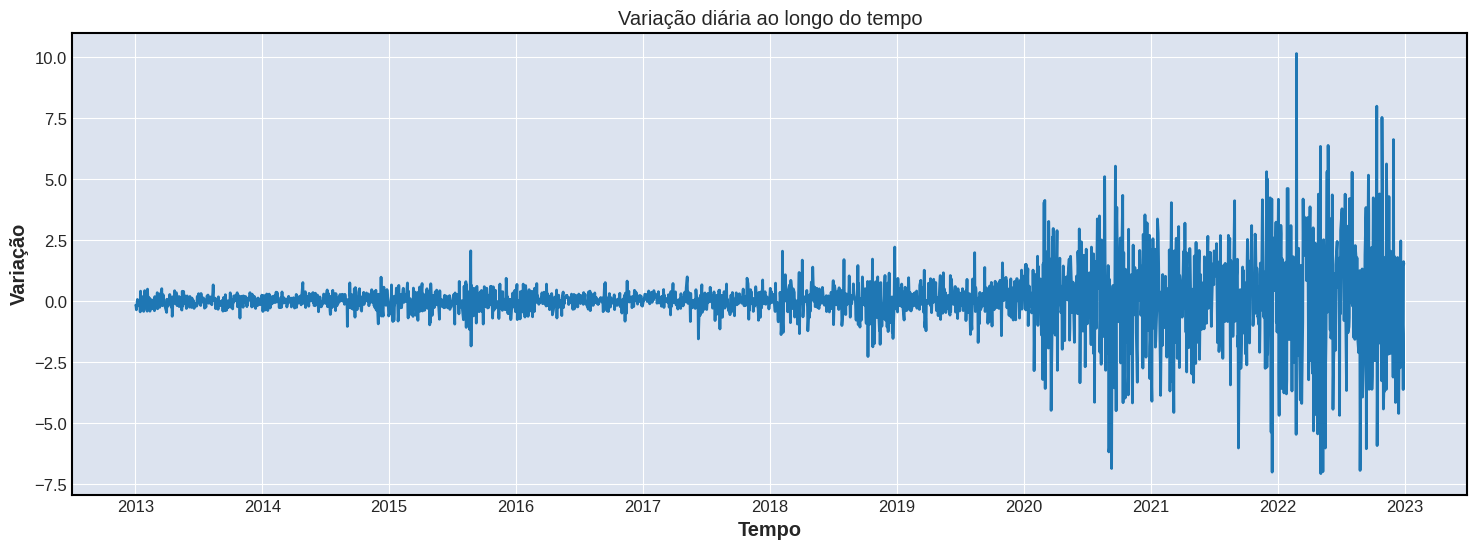

In [9]:
plt.figure(figsize=(18,6))
plt.plot(aapl_data["diff"])
plt.xlabel("Tempo")
plt.ylabel("Variação")
plt.title("Variação diária ao longo do tempo")
plt.show()

In [10]:
aapl_data["delta"] = np.log(aapl_data["Close"] / aapl_data["Open"])

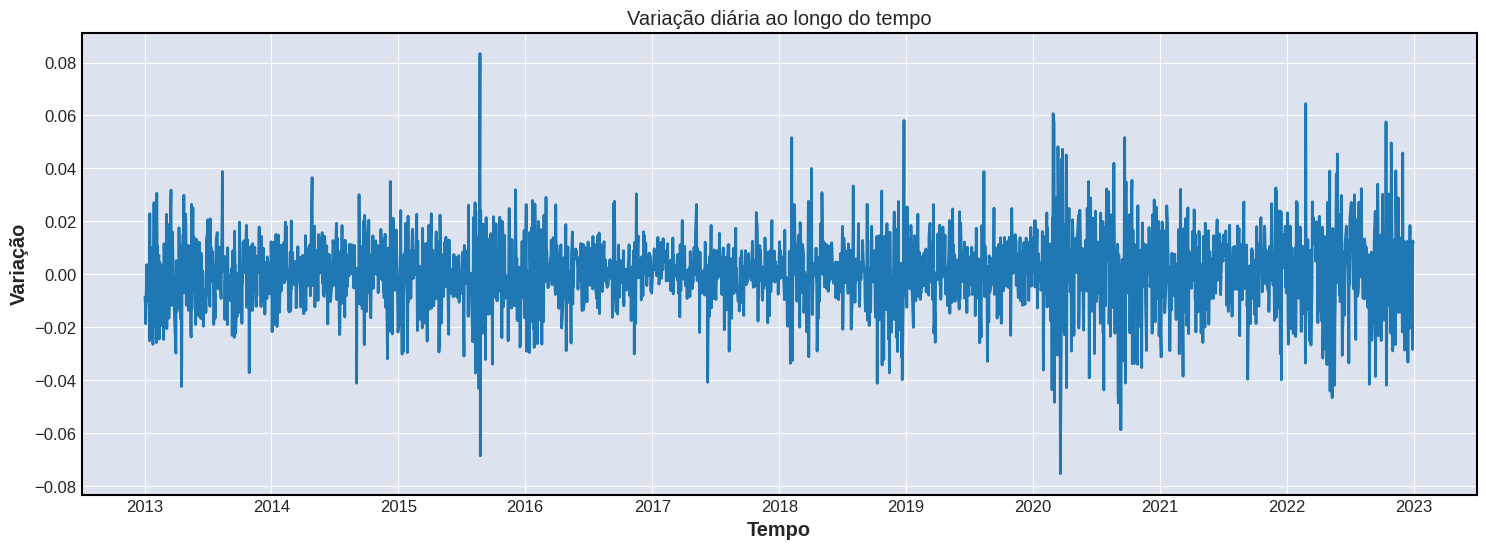

In [11]:
plt.figure(figsize=(18,6))
plt.plot(aapl_data["delta"])
plt.xlabel("Tempo")
plt.ylabel("Variação")
plt.title("Variação diária ao longo do tempo")
plt.show()

In [12]:
# Realizar análises matemáticas e estatísticas com Pandas e Numpy
# Exemplo: Calculando a média e o desvio padrão dos preços de fechamento
mean_close_price = np.mean(aapl_data['delta'])
std_close_price = np.std(aapl_data['delta'])

print(f"Média dos preços de fechamento: {mean_close_price:.2f}")
print(f"Desvio padrão dos preços de fechamento: {std_close_price:.2f}")

Média dos preços de fechamento: 0.00
Desvio padrão dos preços de fechamento: 0.01


# Analisando Retornos

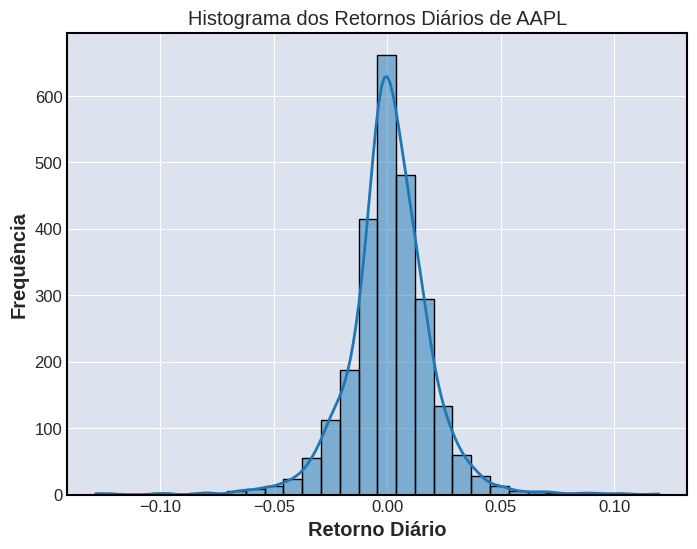

In [13]:
aapl_data["daily_returns"] = aapl_data['Adj Close'].pct_change().dropna()

plt.figure(figsize=(8, 6))
plt.title(f"Histograma dos Retornos Diários de {symbol}")
plt.xlabel("Retorno Diário")
plt.ylabel("Frequência")
sns.histplot(aapl_data["daily_returns"], bins=30, kde=True)
plt.grid(True)
plt.show()

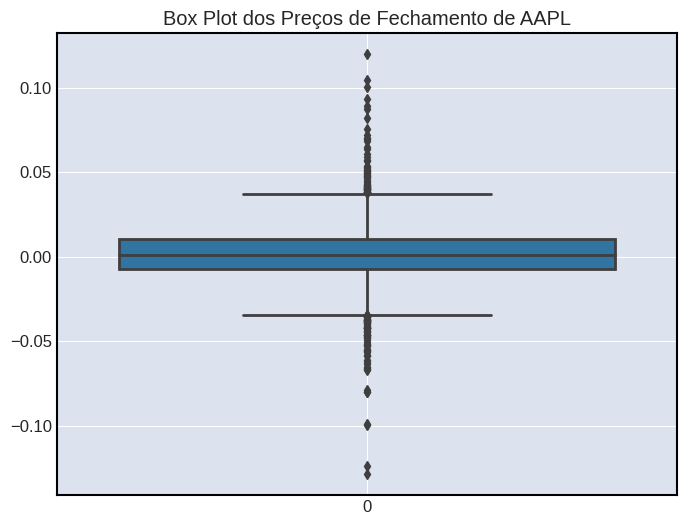

In [14]:
plt.figure(figsize=(8, 6))
plt.title(f"Box Plot dos Preços de Fechamento de {symbol}")
sns.boxplot(aapl_data['daily_returns'])
plt.grid(True)
plt.show()

# Plotando Dispersão entre Abertura e Fechamento

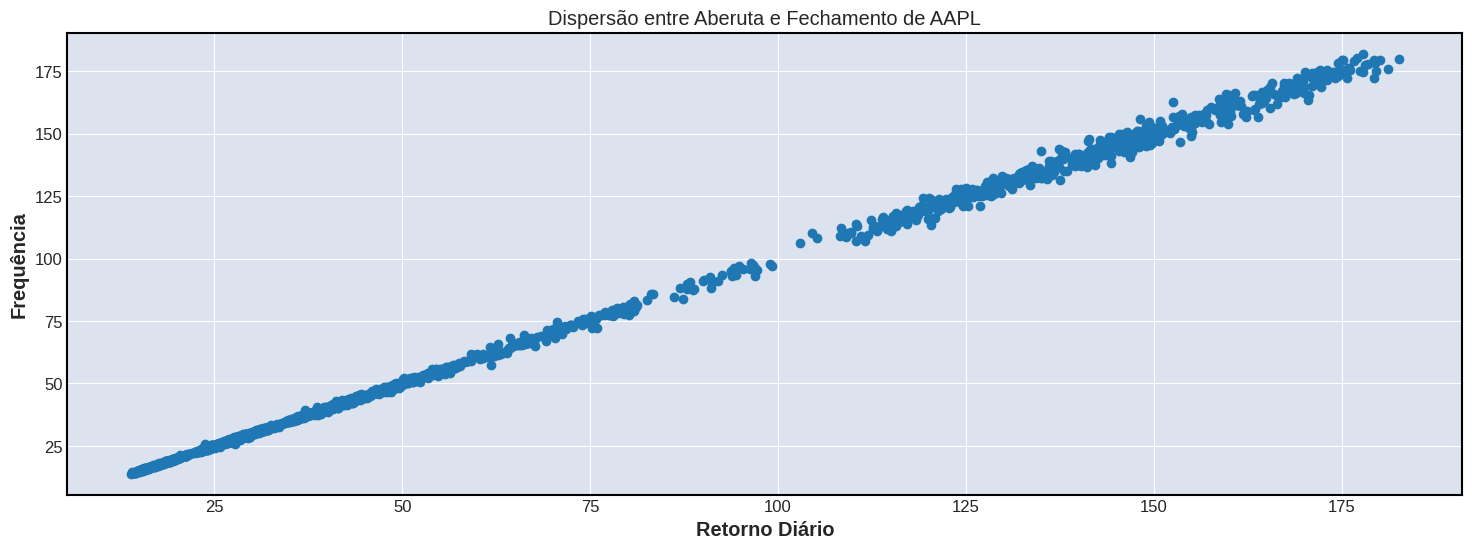

In [15]:
plt.figure(figsize=(18, 6))
plt.title(f"Dispersão entre Aberuta e Fechamento de {symbol}")
plt.xlabel("Retorno Diário")
plt.ylabel("Frequência")
plt.scatter(aapl_data["Open"], aapl_data["Close"])
plt.grid(True)
plt.show()

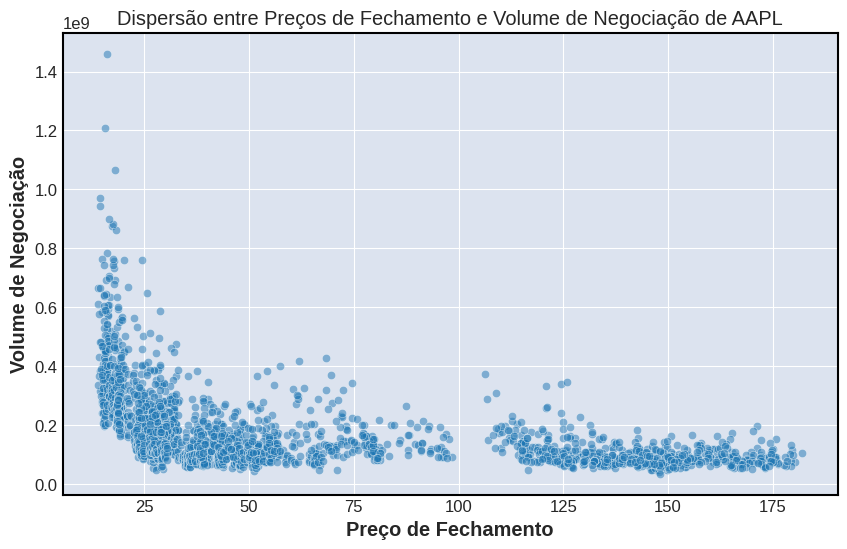

In [16]:
plt.figure(figsize=(10, 6))
plt.title(f"Dispersão entre Preços de Fechamento e Volume de Negociação de {symbol}")
sns.scatterplot(x=aapl_data['Close'], y=aapl_data['Volume'], alpha=0.5)
plt.xlabel("Preço de Fechamento")
plt.ylabel("Volume de Negociação")
plt.grid(True)
plt.show()

# Baixando dados de outra empresa

In [17]:
# Baixar dados de outra empresa (por exemplo, Microsoft - 'MSFT')
symbol2 = "MSFT"
msft_data = yf.download(symbol2, start="2013-01-01", end="2023-01-01")
msft_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,27.250000,27.730000,27.150000,27.620001,22.620344,52899300
2013-01-03,27.629999,27.650000,27.160000,27.250000,22.317312,48294400
2013-01-04,27.270000,27.340000,26.730000,26.740000,21.899632,52521100
2013-01-07,26.770000,26.879999,26.639999,26.690001,21.858679,37110400
2013-01-08,26.750000,26.790001,26.459999,26.549999,21.744026,44703100
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112091,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354095,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100


In [18]:
# Análise multivariada: correlação entre os preços de fechamento de duas empresas
correlation = msft_data['Close'].corr(aapl_data['Close'])
print(f"Correlação entre {symbol} e {symbol2}: {correlation:.2f}")

Correlação entre AAPL e MSFT: 0.98


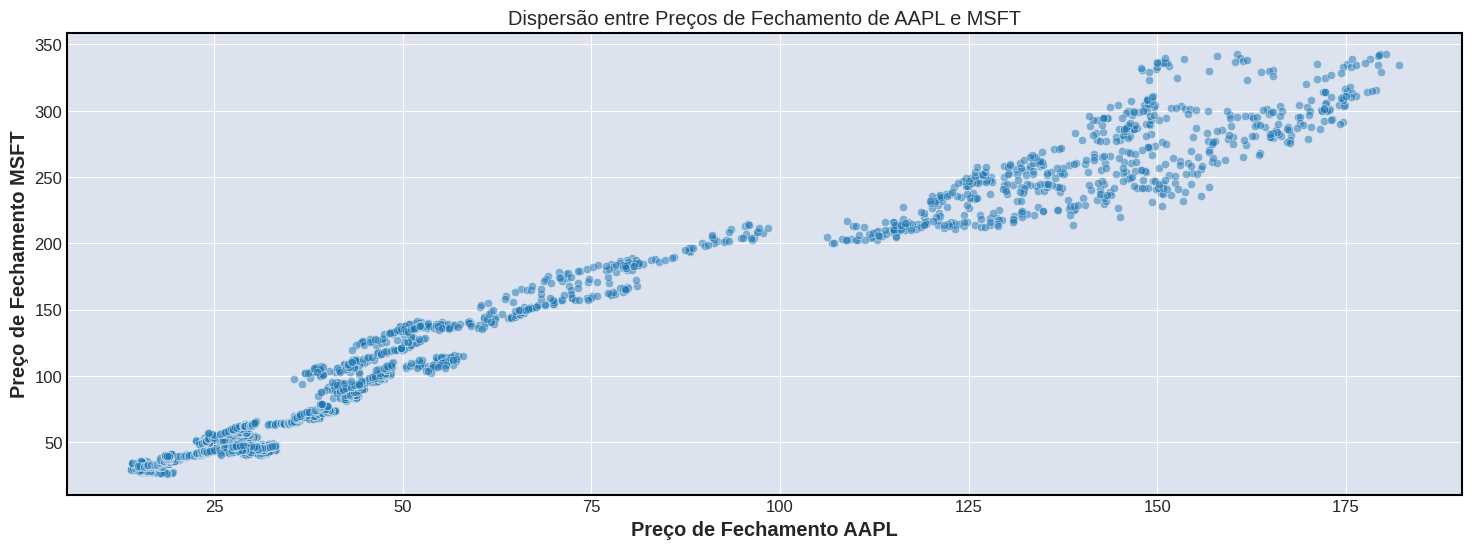

In [19]:
# Gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(18, 6))
plt.title(f"Dispersão entre Preços de Fechamento de {symbol} e {symbol2}")
sns.scatterplot(x=aapl_data['Close'], y=msft_data['Close'], alpha=0.5)
plt.xlabel(f"Preço de Fechamento {symbol}")
plt.ylabel(f"Preço de Fechamento {symbol2}")
plt.grid(True)
plt.show()